In [4]:
# 글꼴을 설치한 후 Colab 런타임을 다시 시작. Colab 메뉴에서 '런타임' 탭을 클릭하고 '런타임 다시 시작'을 선택
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,541 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121654 files and dire

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
data = np.random.randn(1000)
print(data[:10])
cdata = data.cumsum()
cdata[:10]

[-1.3515822   0.76043914  0.9660652   1.54536211  0.77885068 -0.79125614
  0.66224342  0.14919088  0.77581019 -0.59825663]


array([-1.3515822 , -0.59114306,  0.37492214,  1.92028425,  2.69913493,
        1.90787879,  2.57012222,  2.7193131 ,  3.49512329,  2.89686666])

Text(0, 0.5, 'Sum')

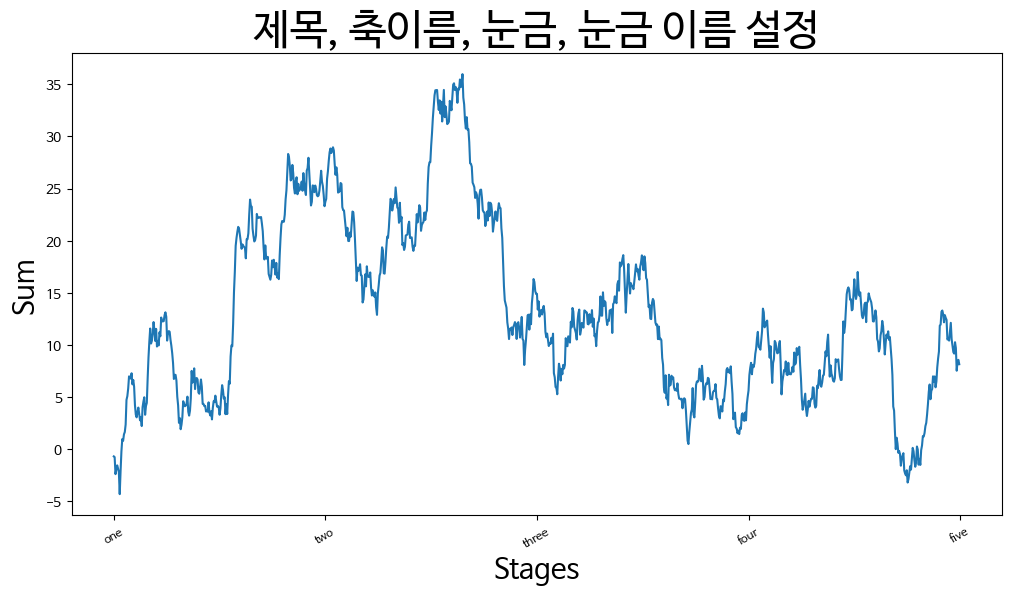

In [3]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.plot(cdata)
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],
                           rotation=30,fontsize='small')
ax.set_title('제목, 축이름, 눈금, 눈금 이름 설정',size=30)
ax.set_xlabel('Stages',size=20)
ax.set_ylabel('Sum',size=20)

Text(0.5, 0, 'Stages')

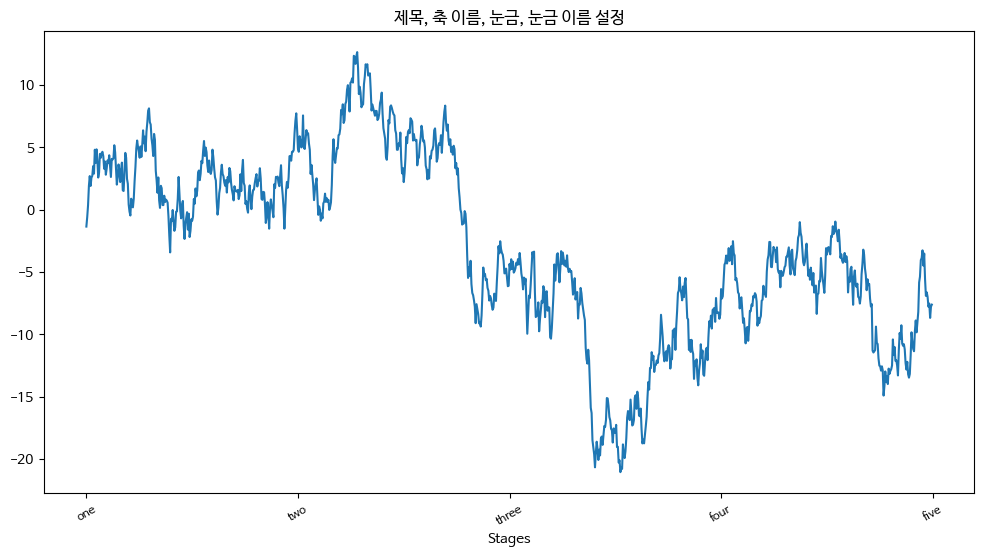

In [5]:
#연도별, 연령별 제품 구매수량 시각화
#한글 폰트 실행되도록 하기

import warnings
warnings.filterwarnings('ignore')
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.plot(cdata)
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],
                           rotation=30, fontsize='small')

ax.set_title('제목, 축 이름, 눈금, 눈금 이름 설정')
ax.set_xlabel('Stages')

In [6]:
%pwd

'/content'

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tips = pd.read_csv('/content/drive/MyDrive/kdt_231026/m3_분석라이브러리/visualization/examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


https://www.kaggle.com/tasneemabdulrahim/tips-dataset

In [8]:
# 빈도표
import pandas as pd
import numpy as np

party_counts = pd.crosstab(tips['day'],tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [9]:
pd.pivot_table(tips,index='day',
               columns='size',
               values='total_bill',
               aggfunc='count',fill_value = 0)

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [10]:
pc_25 = party_counts.loc[:,2:5]
pc_25

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [11]:
pc_25.sum(1)

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

In [12]:
# pc_25 각 열방향 합계 1로 정규화
# pc_25.apply(lambda x : x/pc_25.sum(1))
pc_25.div(pc_25.sum(1),axis=0)

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

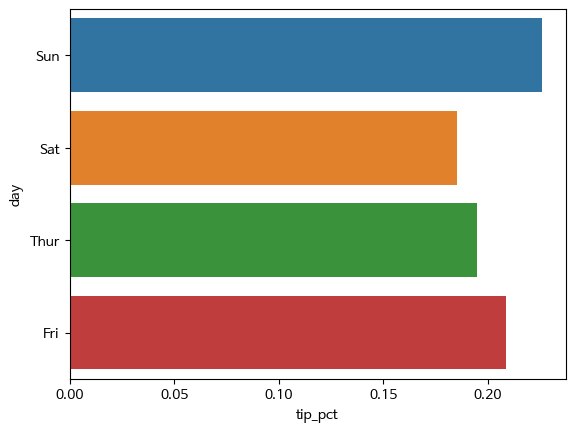

In [13]:
# 요일별 팁의 비중을 시각화(수평 막대그래프)
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip']) # tip 비중
print(tips.head())
sns.barplot(x='tip_pct',y='day',data=tips, orient='h',ci=None)

<Axes: xlabel='tip_pct', ylabel='day'>

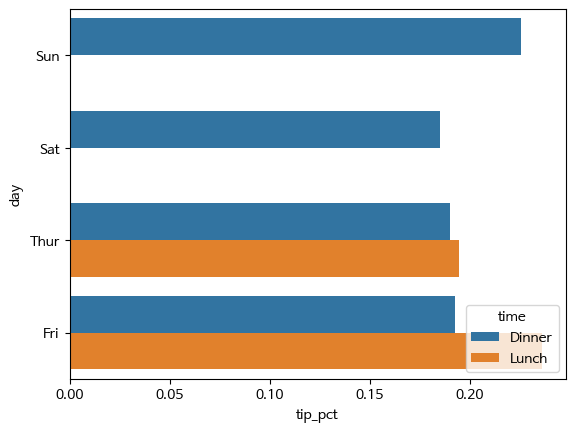

In [14]:
sns.barplot(x='tip_pct',y='day', hue= 'time', data=tips, orient='h',ci=None)

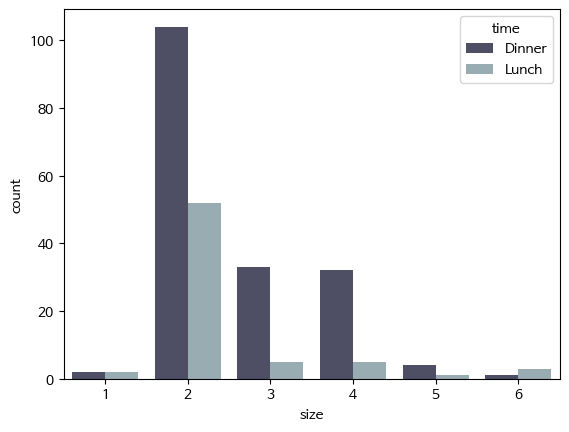

In [17]:
# countplot()
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.countplot(x='size', data=tips, hue='time', palette='bone')
plt.show()

In [18]:
# np.random.normal(loc, scale, size) : 정규분포 난수 샘플
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
values = pd.Series(np.concatenate([comp1,comp2]))
values.describe()

count    400.000000
mean       5.093863
std        5.351159
min       -2.075205
25%       -0.036337
50%        3.116629
75%       10.185927
max       16.586691
dtype: float64

<Axes: ylabel='Count'>

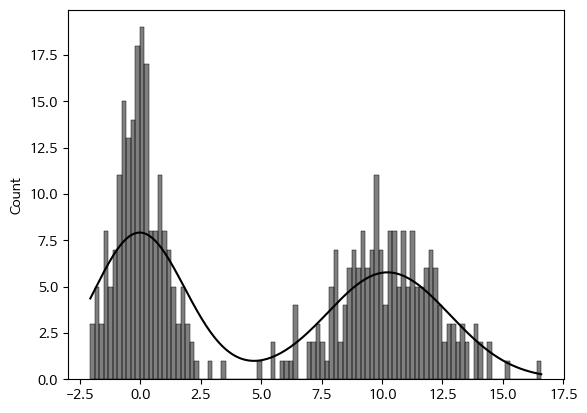

In [19]:
sns.histplot(values,bins=100,color='k',kde=True)
# sns.displot(values,bins=100,color='k',kde=True)

In [20]:
fish_multi = pd.read_csv('/content/drive/MyDrive/kdt_231026/m3_분석라이브러리/visualization/dataset/4_fm2.csv')
fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


<Axes: xlabel='length', ylabel='Count'>

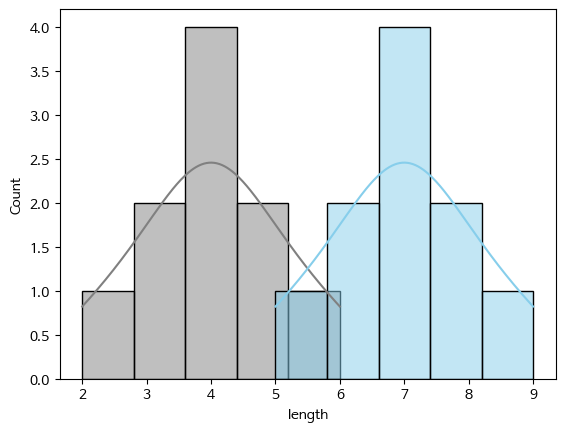

In [21]:
length_a = fish_multi.query('species=="A"')['length']
length_b = fish_multi.query('species=="B"')['length']
sns.histplot(length_a, bins=5, color='gray', kde=True)
sns.histplot(length_b, bins=5, color='skyblue', kde=True)

<Axes: xlabel='species', ylabel='length'>

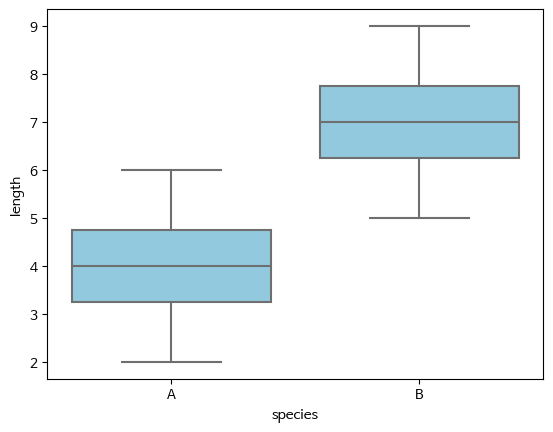

In [22]:
# box plot
sns.boxplot(x='species',y='length',data=fish_multi,color='skyblue')

<Axes: xlabel='species', ylabel='length'>

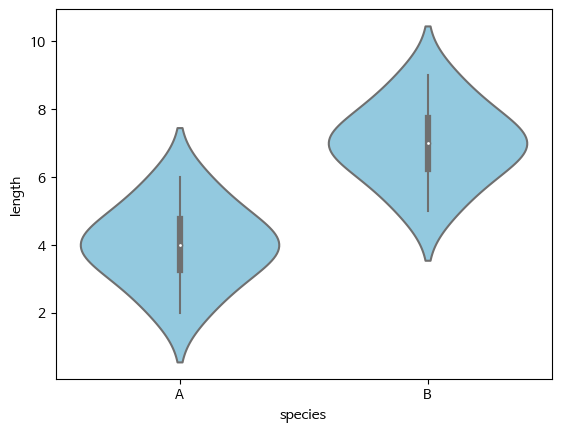

In [23]:
# 바이올린 플롯
# 커널 밀도추정의 결과를 y축 방향에 추가하여 데이터가 퍼져있는 분산의 정도 파악
sns.violinplot(x='species',y='length',data=fish_multi,color='skyblue')

In [24]:
cov_data = pd.read_csv('/content/drive/MyDrive/kdt_231026/m3_분석라이브러리/visualization/dataset/4_cov.csv')
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


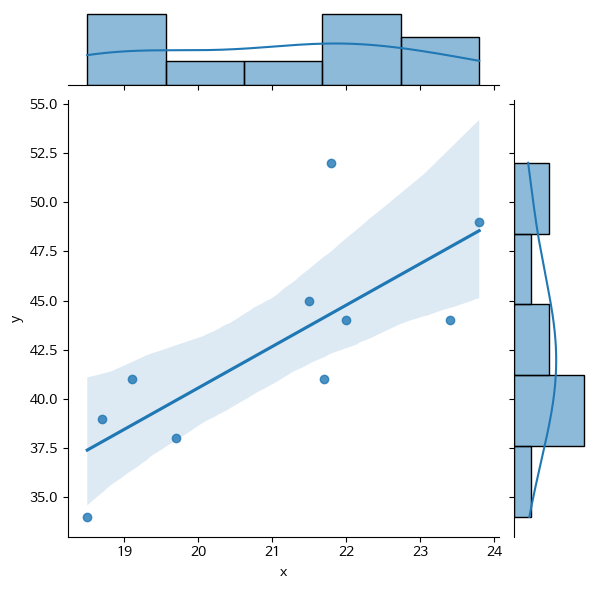

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cov_data' is your DataFrame and it has columns 'x' and 'y'
sns.jointplot(x='x', y='y', data=cov_data, kind='reg')

plt.show()

In [28]:
import pandas as pd
df_auto = pd.read_excel('/content/drive/MyDrive/kdt_231026/m3_분석라이브러리/visualization/dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


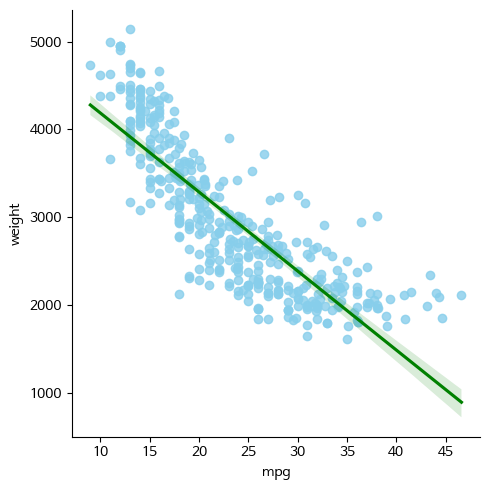

In [29]:
sns.lmplot(x='mpg',y='weight',data=df_auto,scatter_kws={'color':'skyblue'},
          line_kws={'color':'green'})

<Axes: xlabel='mpg', ylabel='weight'>

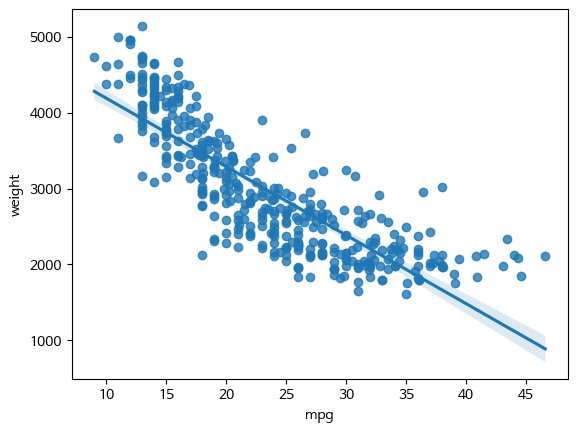

In [30]:
# sns.regplot(x='mpg',y='weight',data=df_auto, fit_reg=False)
sns.regplot(x='mpg',y='weight',data=df_auto) # default : fig_reg=True

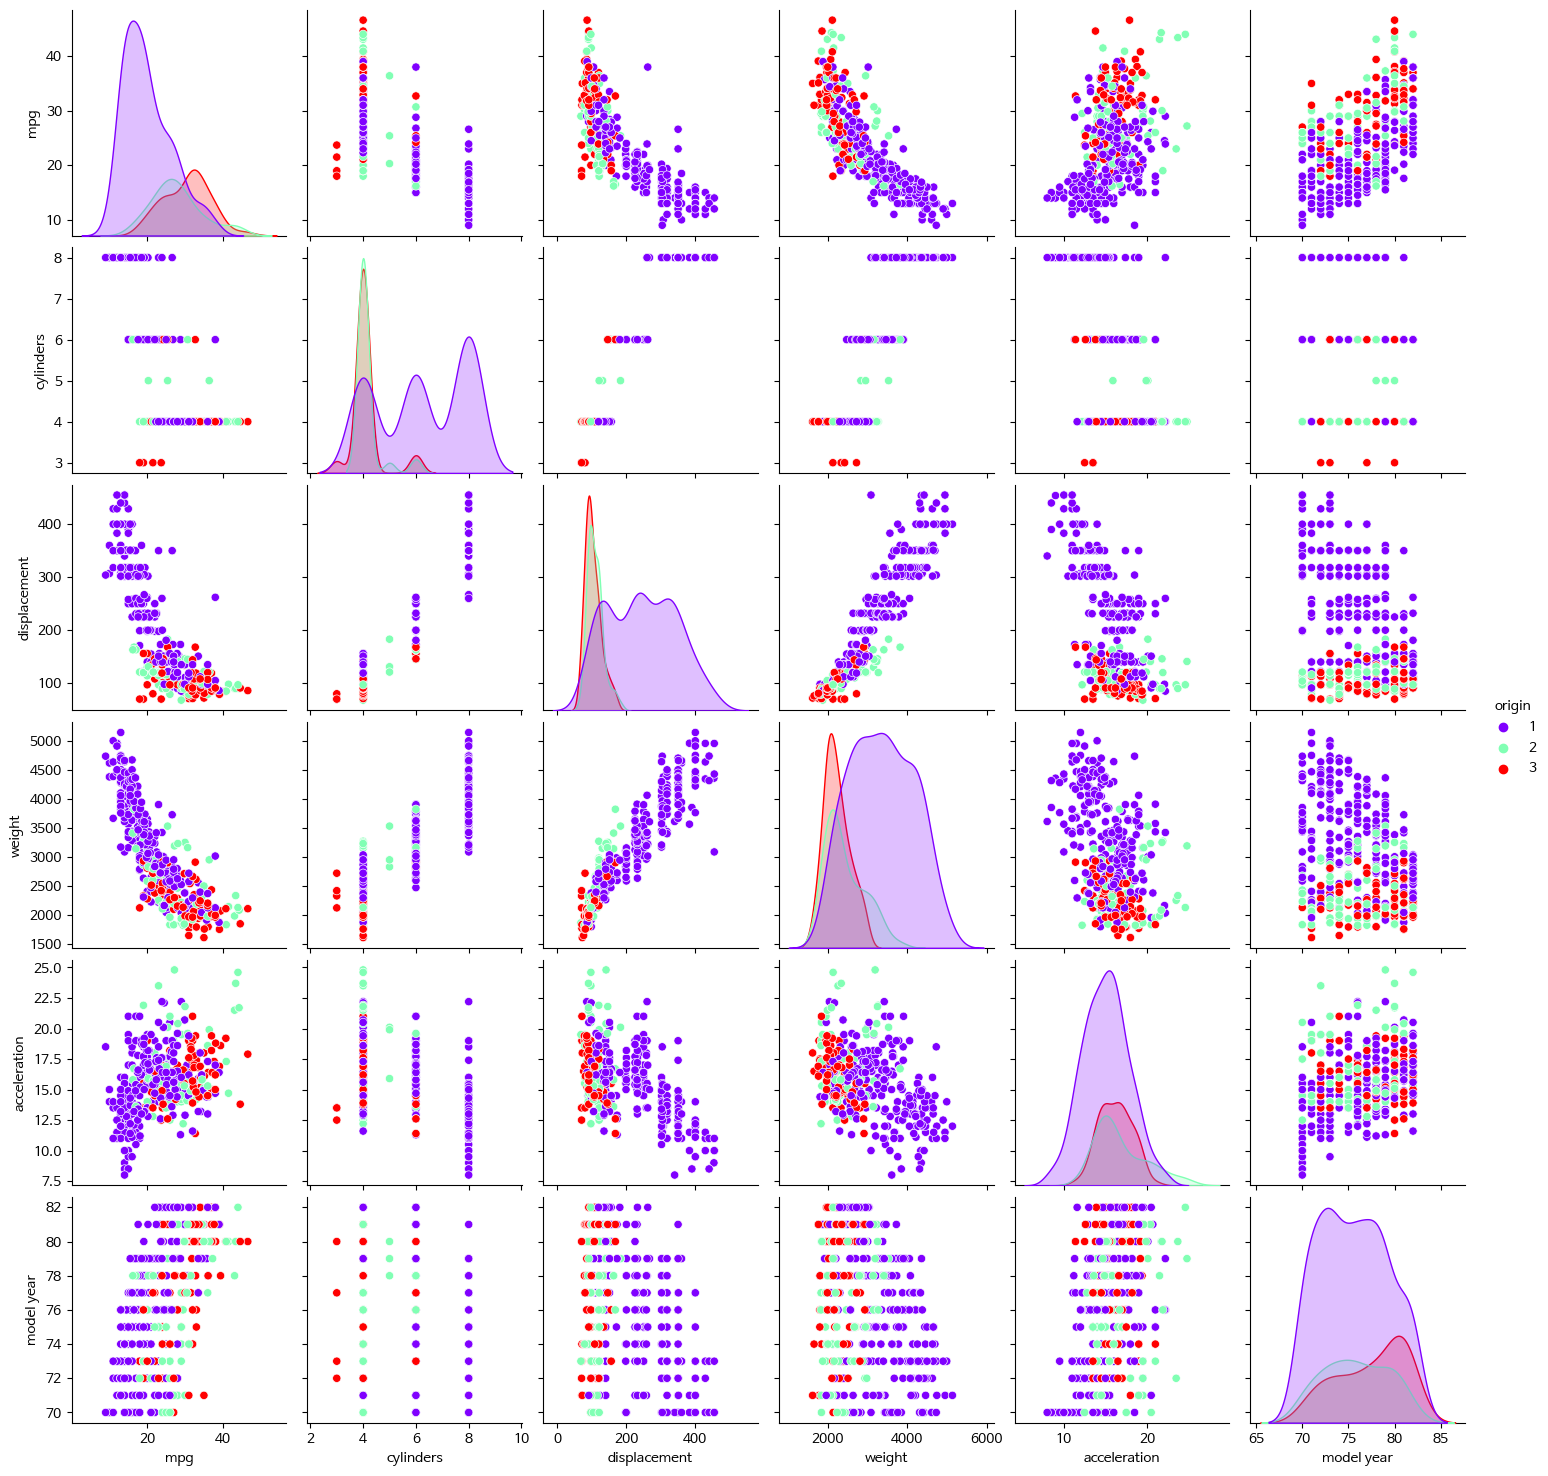

In [31]:
import seaborn as sns
sns.pairplot(df_auto, hue='origin',palette='rainbow')

Text(0.5, 1.0, 'Heatmap of the Dataset')

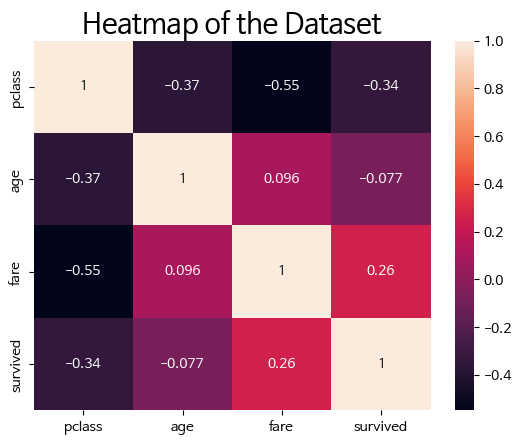

In [32]:
t_df = sns.load_dataset('titanic')
t_df[['pclass','age','fare','survived']].corr()
sns.heatmap(t_df[['pclass','age','fare','survived']].corr(),annot=True)
plt.title('Heatmap of the Dataset',fontsize=20)

In [33]:
table = t_df.pivot_table(index=['sex'],columns=['class'],values=['survived'],
                        aggfunc='mean')
table

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<Axes: xlabel='None-class', ylabel='sex'>

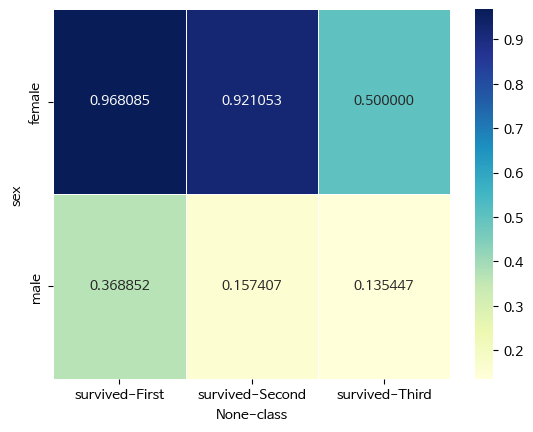

In [34]:
sns.heatmap(table,
           annot=True, fmt='f',
           cmap='YlGnBu',
           linewidth=.5,
           cbar=True)

In [35]:
import numpy as np
fish_data = np.array([ 5, 7, 9,1,5, 6, 6, 2,  4,  4,  5,  6,  7,  3,  8, 10])

<Axes: ylabel='Count'>

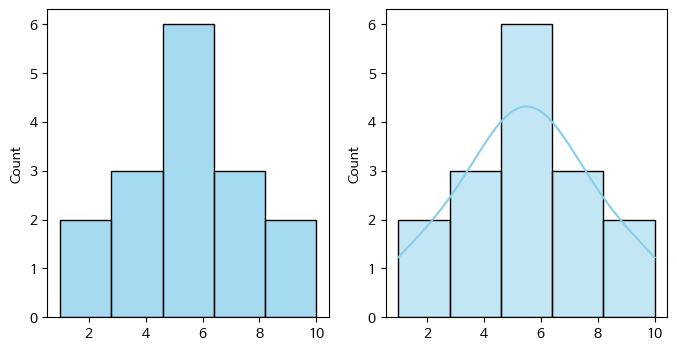

In [36]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.histplot(fish_data,color='skyblue',kde=False,ax=ax1)
sns.histplot(fish_data,color='skyblue',kde=True,ax=ax2)